<a href="https://colab.research.google.com/github/mayorga09/Mineria_de_Datos/blob/main/FINCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINANZAS CORPORATIVAS



*   Jisbeth Jaquelin Díaz Vázquez 1857602
*   Julio César Ramiro Mayorga 1842201





# Frontera Eficiente de Markowitz
Es aquella que dado un mismo nivel de volatilidad busca maximizar el retorno esperado



In [ ]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
val = ['KOF', 'ARCA', 'OMA','GRUMA','WALMEX']
pf_dat = pd.read_csv('/content/drive/MyDrive/sample_data/ACCIONES.csv', index_col='Date')

In [ ]:
pf_dat.head()

,KOF,ARCA,OMA,GRUMA,WALMEX
Date,,,,,
12/05/2020,97.87,101.52,92.33,243.76,58.37
13/05/2020,93.58,99.09,90.44,246.16,57.47
14/05/2020,91.78,98.42,88.33,237.89,56.72
15/05/2020,93.28,98.96,85.61,233.92,56.03
18/05/2020,96.09,101.14,91.35,236.40,58.48


In [ ]:
pf_dat.tail()

,KOF,ARCA,OMA,GRUMA,WALMEX
Date,,,,,
06/05/2022,109.06,127.57,140.99,243.43,69.64
09/05/2022,109.97,128.99,137.98,246.31,69.48
10/05/2022,109.07,129.20,140.09,243.87,72.00
11/05/2022,108.78,129.78,140.44,247.23,73.91
12/05/2022,110.97,129.98,139.88,251.77,73.85


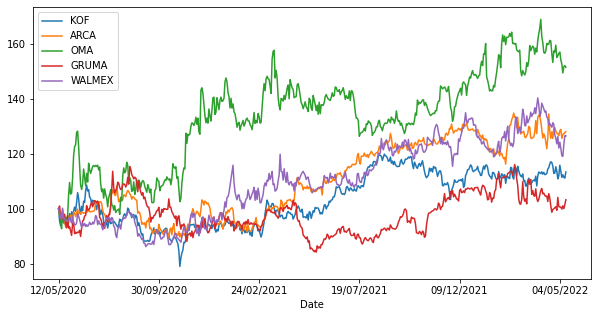

In [ ]:
(pf_dat / pf_dat.iloc[0] * 100).plot(figsize=(10, 5))

In [ ]:
log_rend = np.log(pf_dat / pf_dat.shift(1))

In [ ]:
log_rend.mean() * 250

KOF       0.062065
ARCA      0.122097
OMA       0.205245
GRUMA     0.015974
WALMEX    0.116222
dtype: float64

In [ ]:
log_rend.cov() * 250

,KOF,ARCA,OMA,GRUMA,WALMEX
KOF,0.052947,0.017301,0.026164,0.010236,0.010683
ARCA,0.017301,0.051018,0.014122,0.012472,0.011219
OMA,0.026164,0.014122,0.123838,0.008713,0.021472
GRUMA,0.010236,0.012472,0.008713,0.073417,0.012556
WALMEX,0.010683,0.011219,0.021472,0.012556,0.070310


In [ ]:
log_rend.corr()

,KOF,ARCA,OMA,GRUMA,WALMEX
KOF,1.000000,0.332869,0.323111,0.164177,0.175091
ARCA,0.332869,1.000000,0.177665,0.203784,0.187321
OMA,0.323111,0.177665,1.000000,0.091373,0.230112
GRUMA,0.164177,0.203784,0.091373,1.000000,0.174756
WALMEX,0.175091,0.187321,0.230112,0.174756,1.000000


In [ ]:
num_val = len(val)

Prueba para Randomizar los Pesos

In [ ]:
pesos = np.random.random(num_val)
pesos /= np.sum(pesos)
pesos

array([0.21586225, 0.079725  , 0.30039785, 0.22008825, 0.18392665])

Prueba para verificar que los pesos sean <1

In [ ]:
pesos[0] + pesos[1] + pesos[2]+ pesos[3]+ pesos[4]

0.9999999999999999

In [ ]:
pfolio_rend = []
pfolio_vol = []
aux2=np.empty((10000,5))
for x in range (10000): #Ciclo para generar 10,000 pesos
    pesos = np.random.random(num_val) #Generamos pesos aleatorios entre nuestras 5 empresas
    pesos /= np.sum(pesos) # Nos aseguramos que nuestros pesos sean una suma =1
    aux2[x]=pesos #variable para guardar nuestros pesos
    pfolio_rend.append(np.sum(pesos * log_rend.mean()) * 250) #variable para guardar el rendimiento
    pfolio_vol.append(np.sqrt(np.dot(pesos.T,np.dot(log_rend.cov() * 250, pesos)))) #Variable para guarar la volatilidad
    
pfolio_rend = np.array(pfolio_rend) #Vector de Rendimientos
pfolio_vol = np.array(pfolio_vol) # Vector de Volatilidad

pfolio_rend, pfolio_vol

(array([0.11846997, 0.14420849, 0.11931908, ..., 0.05215691, 0.10677097,
        0.09434024]),
 array([0.17428842, 0.20698177, 0.17975255, ..., 0.1816329 , 0.17103   ,
        0.15846817]))

In [ ]:
portafolios = pd.DataFrame({'Rendimiento': pfolio_rend, 'Volatilidad': pfolio_vol})

In [ ]:
portafolios.head()

,Rendimiento,Volatilidad
0,0.118470,0.174288
1,0.144208,0.206982
2,0.119319,0.179753
3,0.100198,0.167836
4,0.119439,0.173009


In [ ]:
portafolios.tail()

,Rendimiento,Volatilidad
9995,0.094796,0.163505
9996,0.125281,0.200081
9997,0.052157,0.181633
9998,0.106771,0.171030
9999,0.094340,0.158468


Text(0, 0.5, 'Rendimiento Esperado')

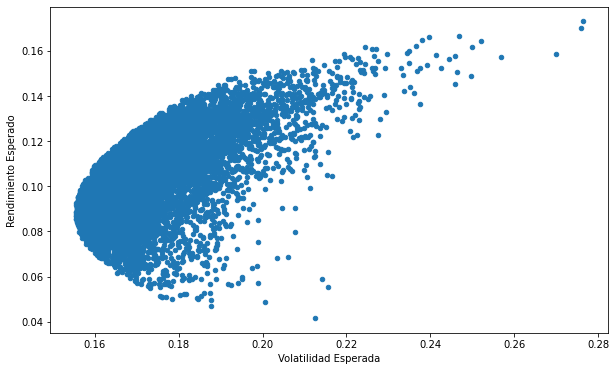

In [ ]:
portafolios.plot(x='Volatilidad', y='Rendimiento', kind='scatter', figsize=(10, 6));
plt.xlabel('Volatilidad Esperada')
plt.ylabel('Rendimiento Esperado')

Definimos nuestra Tasa Libre de Riesgo, Cetes 357 dias, tasa convertida a Diara

In [ ]:
rf=0.02320091/100


Calulamos nuestra Prima de Riesgo

In [ ]:
pr=(pfolio_rend-rf)/pfolio_vol
pr

array([0.67840398, 0.69559983, 0.66250563, ..., 0.28587827, 0.62292558,
       0.59386201])

Insertamos la prima de riesgo al portafolio

In [ ]:
MP=pd.DataFrame(aux2,columns=['KOF', 'ARCA', 'OMA','GRUMA','WALMEX'])


In [ ]:
ppr = pd.DataFrame({'Rendimiento': pfolio_rend, 'Volatilidad': pfolio_vol,"Prima de Riesgo":pr,
                    'KOF': MP['KOF'],'ARCA': MP['ARCA'],'OMA': MP['OMA'],'GRUMA': MP['GRUMA'],"WALMEX": MP['WALMEX']})

In [ ]:
ppr.head()

,Rendimiento,Volatilidad,Prima de Riesgo,KOF,ARCA,OMA,GRUMA,WALMEX
0,0.118470,0.174288,0.678404,0.243727,0.166038,0.269585,0.095038,0.225613
1,0.144208,0.206982,0.695600,0.006295,0.138816,0.339719,0.027243,0.487928
2,0.119319,0.179753,0.662506,0.249086,0.130519,0.309279,0.116841,0.194275
3,0.100198,0.167836,0.595614,0.330027,0.352664,0.159705,0.144046,0.013559
4,0.119439,0.173009,0.689018,0.229638,0.184791,0.255779,0.081826,0.247966


In [ ]:
ppr.tail()

,Rendimiento,Volatilidad,Prima de Riesgo,KOF,ARCA,OMA,GRUMA,WALMEX
9995,0.094796,0.163505,0.578354,0.104070,0.255858,0.053469,0.219987,0.366615
9996,0.125281,0.200081,0.624992,0.405318,0.164747,0.363962,0.023531,0.042443
9997,0.052157,0.181633,0.285878,0.397889,0.043531,0.057394,0.477635,0.023551
9998,0.106771,0.171030,0.622926,0.012417,0.373568,0.051710,0.155384,0.406920
9999,0.094340,0.158468,0.593862,0.320505,0.336740,0.046980,0.106586,0.189190


In [ ]:
MOb=ppr.sort_values('Prima de Riesgo',ascending=False)

In [ ]:
MOb.head().to_csv("Portafolio Optimo.csv")
MOb.head()

,Rendimiento,Volatilidad,Prima de Riesgo,KOF,ARCA,OMA,GRUMA,WALMEX
2480,0.147348,0.191804,0.767013,0.001121,0.385592,0.342848,0.015963,0.254477
9824,0.147617,0.192358,0.766204,0.022413,0.372527,0.347169,0.004845,0.253046
6387,0.138311,0.180849,0.763501,0.060692,0.419628,0.267649,0.009145,0.242885
8755,0.150861,0.197337,0.763311,0.009803,0.356386,0.378245,0.005946,0.249620
6106,0.144707,0.189296,0.763223,0.024092,0.468102,0.325670,0.019476,0.162660


Un ejemplo sería que si nosotros queremos Invertir 30 mil pesos, tendríamos que dividir nuestro dinero asi:

In [ ]:
inv=30000
KOF=inv*MOb['KOF']
ARCA=inv*MOb['ARCA']
OMA=inv*MOb['OMA']
GRUMA=inv*MOb['GRUMA']
WALMEX=inv*MOb['WALMEX']
Port=pd.DataFrame({'KOF': KOF,'ARCA': ARCA, 'OMA': OMA, 'GRUMA': GRUMA, 'WALMEX': WALMEX})
Port.head().to_csv("Portafolio Optimo Inv.csv")
Port.head()

,KOF,ARCA,OMA,GRUMA,WALMEX
2480,33.619424,11567.753561,10285.445861,478.883140,7634.298013
9824,672.401404,11175.815665,10415.057252,145.339479,7591.386200
6387,1820.769397,12588.843424,8029.468996,274.359195,7286.558988
8755,294.092036,10691.587382,11347.354648,178.376201,7488.589732
6106,722.758653,14043.067300,9770.087309,584.285644,4879.801095


En cantidad de acciones seria:

In [ ]:
KOF=inv*MOb['KOF']/110.97
ARCA=inv*MOb['ARCA']/129.98
OMA=inv*MOb['OMA']/139.880
GRUMA=inv*MOb['GRUMA']/244.76
WALMEX=inv*MOb['WALMEX']/74.220
Port=pd.DataFrame({'KOF': KOF,'ARCA': ARCA, 'OMA': OMA, 'GRUMA': GRUMA, 'WALMEX': WALMEX})
Port.head().to_csv("Portafolio Optimo Acciones.csv")
Port.head()

,KOF,ARCA,OMA,GRUMA,WALMEX
2480,0.302960,88.996411,73.530497,1.956542,102.860388
9824,6.059308,85.981041,74.457086,0.593804,102.282218
6387,16.407762,96.852157,57.402552,1.120932,98.175141
8755,2.650194,82.255635,81.122066,0.728780,100.897194
6106,6.513100,108.040216,69.846206,2.387178,65.747792


# CAPM

Definimos nuestras betas para cada empresa

In [ ]:
b_kof=0.52
b_arca=0.56
b_oma=1.42
b_gruma=0.31
b_walmex=0.55

In [ ]:
rend=log_rend.mean() * 250
rend

KOF       0.062065
ARCA      0.122097
OMA       0.205245
GRUMA     0.015974
WALMEX    0.116222
dtype: float64

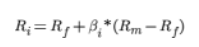

Como BenchMark Usaremos: el S&P/BMV IPC 

In [ ]:
	rf=0.0871

In [ ]:
pf_IPC = pd.read_csv('/content/drive/MyDrive/sample_data/IPC.csv', index_col='Fecha')
pf_IPC.head()

,Cierre
Fecha,
12/05/2020,37462.89
13/05/2020,36394.59
14/05/2020,36094.14
15/05/2020,35691.39
18/05/2020,37112.46


In [ ]:
log_rend_ipc = np.log(pf_IPC['Cierre'] / pf_IPC['Cierre'].shift(1))
riskpremium = (log_rend_ipc.mean()*250) - rf
riskpremium

0.04865210812041386

In [ ]:
log_rend_ipc.mean()*250

0.13575210812041386

In [ ]:
R_KOF=rf+b_kof*riskpremium
R_Arca=rf+b_arca*riskpremium
R_Oma=rf+b_oma*riskpremium
R_Gruma=rf+b_gruma*riskpremium
R_Walmex=rf+b_walmex*riskpremium
cpm=pd.DataFrame({'KOF': R_KOF,'ARCA': R_Arca, 'OMA': R_Oma, 'GRUMA': R_Gruma, 'WALMEX': R_Walmex},index=[1])
cpm

,KOF,ARCA,OMA,GRUMA,WALMEX
1,0.112399,0.114345,0.156186,0.102182,0.113859


# WACC

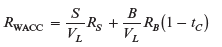

Definimos nuestras Variables

In [ ]:
S_KOF=(645 + 83329)*1000000#BONOS
Re_KOF=16806.66*1000000*110.97#ACCIONES
Vl_kof=S_KOF+Re_KOF
S_ARCA=(7953.21+43527	)*1000000
Re_ARCA=1764.28*1000000*129.98
Vl_arca=S_ARCA+Re_ARCA
S_OMA=390.11*1000000*139.880
Re_OMA=(2729.33+4996.62	)*1000000
Vl_oma=S_OMA+Re_OMA
S_GRUMA=(381.03*1000000)*244.76
Re_GRUMA=(94.64+1166.42)*1000000
Vl_gruma=S_GRUMA+Re_GRUMA
S_WALMEX=17461.4*1000000*74.220
Re_WALMEX=(3438.47)*1000000
Vl_walmex=S_WALMEX+Re_WALMEX
t_kof=6609/22852 #Tasa de Impuestos
t_arca=6983.09/22072.4
t_oma=279.11/1031.71	
t_gruma=39.58	/100.77
t_walmex=13157.58/57295.65
bono_kof=0.0736 # Tasa de Bonos
bono_arca=0.0675 
bono_oma=0.0935
bono_gruma=0.07 
bono_walmex=0.05

In [ ]:
S_KOF, Re_KOF, Vl_kof, S_ARCA, Re_ARCA, Vl_arca, S_OMA, Re_OMA, Vl_oma, S_GRUMA, Re_GRUMA, Vl_gruma, S_WALMEX,Re_WALMEX, Vl_walmex, t_kof, t_arca, t_oma, t_gruma, t_walmex, bono_kof, bono_arca, bono_oma, bono_gruma, bono_walmex

(83974000000,
 1865035060200.0,
 1949009060200.0,
 51480210000.0,
 229321114399.99997,
 280801324400.0,
 54568586800.0,
 7725950000.0,
 62294536800.0,
 93260902800.0,
 1261060000.0000002,
 94521962800.0,
 1295985108000.0,
 3438470000.0,
 1299423578000.0,
 0.28920882198494663,
 0.3163720302277958,
 0.2705314477905613,
 0.3927756276669644,
 0.2296436116877983,
 0.0736,
 0.0675,
 0.0935,
 0.07,
 0.05)

Calculamos el WACC de cada Empresa

In [ ]:
W_kof=(S_KOF/Vl_kof)*R_KOF+(Re_KOF/Vl_kof)*bono_kof*(1-t_kof)
W_arca=(S_ARCA/Vl_arca)*R_Arca+(Re_ARCA/Vl_arca)*bono_arca*(1-t_arca)
W_oma=(S_OMA/Vl_oma)*R_Oma+(Re_OMA/Vl_oma)*bono_oma*(1-t_oma)
W_gruma=(S_GRUMA/Vl_gruma)*R_Gruma+(Re_GRUMA/Vl_gruma)*bono_gruma*(1-t_gruma)
W_walmex=(S_WALMEX/Vl_walmex)*R_Walmex+(Re_WALMEX/Vl_walmex)*bono_walmex*(1-t_walmex)
WACC=pd.DataFrame({'KOF': W_kof,'ARCA': W_arca, 'OMA': W_oma, 'GRUMA': W_gruma, 'WALMEX': W_walmex},index=[1])
WACC

,KOF,ARCA,OMA,GRUMA,WALMEX
1,0.053106,0.051641,0.177234,0.042247,0.074672
